In [29]:
!git clone -l -s git://github.com/nikhil490/First-Step.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 85 (delta 24), reused 15 (delta 1), pack-reused 0
Receiving objects: 100% (85/85), 5.33 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo
'airbnb (1).csv'	  GradientDescentTensorFlow.ipynb
 airbnb1.csv		  logistic_regression_tf.ipynb
 airbnb.csv		  multilayer_iris_dataset.ipynb
 airbnb_edited.ipynb	  new_list.csv
 airbnb.ipynb		  README.md
 FuelConsumptionCo2.csv   src-checkpoint.ipynb


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [30]:
data = pd.read_csv('airbnb1.csv')
data.describe()

,Unnamed: 0,reviews_per_month,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,distance_km,price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,amenities,requires_license,instant_bookable,guests_included,extra_people,review_scores_rating,require_guest_phone_verification,bathrooms,bedrooms,beds,accommodates,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,host_is_superhost,maximum_nights,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Loft,property_type_Other,property_type_Pension (South Korea),property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
count,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.0,19775.000000,19775.0,19775.000000,19775.000000,19775.000000,19775.000000,19775.0,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.0,19775.000000,19775.000000,19775.000000,19775.000000,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.000000,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.000000,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.000000,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.0,19775.000000,19775.000000,19775.000000,19775.0,19775.0
mean,11444.838432,0.996869,16.116511,6.612339,1.578407,72.505082,4.365445,57.580480,0.481416,0.518584,0.0,15.838736,1.0,0.304779,1.302149,7.917472,95.134109,0.0,1.080126,1.147863,1.554488,2.581138,1.711504,1.0,0.388875,0.744678,0.126776,618.716308,0.0,0.0,0.0,0.0,1.0,0.0,0.950341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410872,0.315803,0.273325,0.0,0.0
std,6445.588185,1.301172,31.618719,16.417732,1.961295,114.784876,2.321267,46.561041,0.499667,0.499667,0.0,8.733732,0.0,0.460325,0.686961,10.056459,6.113820,0.0,0.263436,0.594964,0.979176,1.324768,2.382965,0.0,0.487507,0.436053,0.332731,972.891596,0.0,0.0,0.0,0.0,0.0,0.0,0.217244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492005,0.464847,0.445678,0.0,0.0
min,1.000000,0.010000,0.000000,1.000000,1.000000,0.000000,0.198956,0.000000,0.000000,0.000000,0.0,1.000000,1.0,0.000000,1.000000,0.000000,50.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,5859.500000,0.220000,1.000000,2.000000,1.000000,0.000000,2.953777,30.000000,0.000000,0.000000,0.0,10.000000,1.0,0.000000,1.000000,0.000000,93.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,20.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
del data['id']

In [0]:
X = data.drop(["price"],axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import mean_squared_error
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint

#set parameters
batch_size = 32
epochs = 25

model = Sequential()
model.add(Dense(512,input_shape=(data.shape[1]-1,), activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation= 'relu'))

filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.compile(loss = mean_squared_error,
              optimizer = Adam(),
              metrics=['mean_squared_error'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 17797 samples, validate on 1978 samples
Epoch 1/25
17797/17797 [==============================] - 4s 233us/step - loss: 1512.2593 - mean_squared_error: 1512.2593 - val_loss: 1798.5413 - val_mean_squared_error: 1798.5413

Epoch 00001: val_loss improved from inf to 1798.54134, saving model to weights-improvement-01-1798.54.hdf5
Epoch 2/25
17797/17797 [==============================] - 3s 190us/step - loss: 1277.6936 - mean_squared_error: 1277.6936 - val_loss: 1789.4452 - val_mean_squared_error: 1789.4452

Epoch 00002: val_loss improved from 1798.54134 to 1789.44521, saving model to weights-improvement-02-1789.45.hdf5
Epoch 3/25
17797/17797 [==============================] - 4s 204us/step - loss: 1259.0273 - mean_squared_error: 1259.0273 - val_loss: 1741.0779 - val_mean_squared_error: 1741.0779

Epoch 00003: val_loss improved from 1789.44521 to 1741.07789, saving model to weights-improvement-03-1741.08.hdf5
Epoch 4/25
17797/17797 [==============================] - 3s 189us/step -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


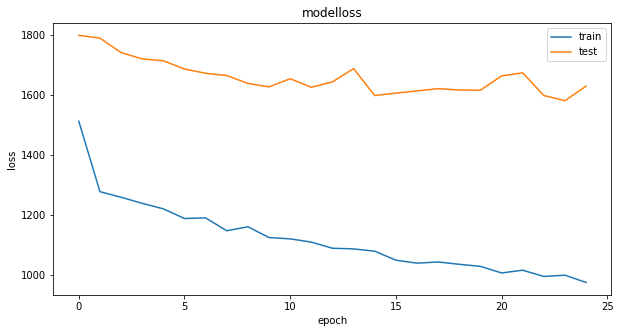

In [34]:
#plot training history
figsize=(10,5)
ax,_ = plt.subplots(figsize=figsize)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('modelloss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upperleft')
plt.show()

In [35]:
ls

'airbnb (1).csv'                       weights-improvement-02-1789.45.hdf5
 airbnb1.csv                           weights-improvement-03-1741.08.hdf5
 airbnb.csv                            weights-improvement-04-1720.14.hdf5
 airbnb_edited.ipynb                   weights-improvement-05-1713.66.hdf5
 airbnb.ipynb                          weights-improvement-06-1686.37.hdf5
 FuelConsumptionCo2.csv                weights-improvement-07-1672.16.hdf5
 GradientDescentTensorFlow.ipynb       weights-improvement-08-1664.56.hdf5
 logistic_regression_tf.ipynb          weights-improvement-09-1638.32.hdf5
 multilayer_iris_dataset.ipynb         weights-improvement-10-1626.81.hdf5
 new_list.csv                          weights-improvement-12-1625.52.hdf5
 README.md                             weights-improvement-15-1597.95.hdf5
 src-checkpoint.ipynb                  weights-improvement-24-1580.77.hdf5
 weights-improvement-01-1798.54.hdf5


In [36]:
import os
import copy

saved_loss_file = None
loss_min = 100000
# r=root, d=directories, f = files
for r, d, f in os.walk('./'):
    for file in f:
        if '.hdf5' in file:
            filename = os.path.join(r, file)
            loss = int(filename.split('-')[3].split('.')[0])
            if loss < loss_min:
                loss_min = loss
                saved_loss_file = filename
                
print("Saved min loss : ",loss_min,"\nFile :",saved_loss_file)

Saved min loss :  1580 
File : ./weights-improvement-24-1580.77.hdf5


In [0]:
#load model
from keras.models import load_model
best_model = load_model(saved_loss_file)

In [0]:
#prediction
pred_mlp = best_model.predict(X_test)

In [39]:
#evaluate
print('\n# Model Evaluate')
results = best_model.evaluate(X_test, y_test)
print('Test Mse Loss:', results[0])

RMSE = np.sqrt(results[0])
print("RMSE:",RMSE)


# Model Evaluate
1978/1978 [==============================] - 0s 133us/step
Test Mse Loss: 1580.7728402318078
RMSE: 39.758934093255164
